# Import Required Libraries
Import the necessary libraries, including sklearn, seaborn, and matplotlib.

In [39]:
# Import the necessary libraries, including sklearn, seaborn, and matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Preprocess Data
Scale the features and encode the genre labels using StandardScaler and LabelEncoder.

In [40]:
from sklearn.decomposition import PCA

# Preprocess Data

# Load the features dataset from features.xlsx
features_df = pd.read_excel("features_reduced.xlsx")
features_df = features_df.drop(columns=["Unnamed: 0"])


# Drop the specified columns
#features_df = features_df.drop(columns=columns_to_drop)
print(features_df.head())
print(features_df.columns)


# Scale the features using StandardScaler
scaler = StandardScaler()
X = features_df.drop(columns=["genre"])
X_scaled = scaler.fit_transform(X)


# Convert the scaled array back to a DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

# Apply PCA to reduce dimensionality
# Apply PCA to reduce dimensionality
pca = PCA(n_components=7)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X)


# Encode the genre labels using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(features_df["genre"])

   zero_crossing_rate  tempo  spectral_bandwidth  spectral_rolloff  \
0            0.123915    107         3088.496673       7158.490047   
1            0.095572    107         2629.647956       5390.134073   
2            0.121432    172         3354.429261       8145.617411   
3            0.145940     99         2884.694760       6136.929557   
4            0.111688    161         3162.160898       7214.923039   

           bass     midrange      treble genre  
0   6889.476562  8104.126953  609.438538   pop  
1  11626.408203  4886.588867  355.432281   pop  
2   7438.665039  5161.620117  675.404053   pop  
3   5058.261719  5891.806152  431.217407   pop  
4  10216.695312  9116.047852  895.013062   pop  
Index(['zero_crossing_rate', 'tempo', 'spectral_bandwidth', 'spectral_rolloff',
       'bass', 'midrange', 'treble', 'genre'],
      dtype='object')


# Split the Data
Split the data into training and testing sets using train_test_split.

In [41]:
# Split the Data

# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train KMeans Model
Train a KMeans clustering model on the training data.

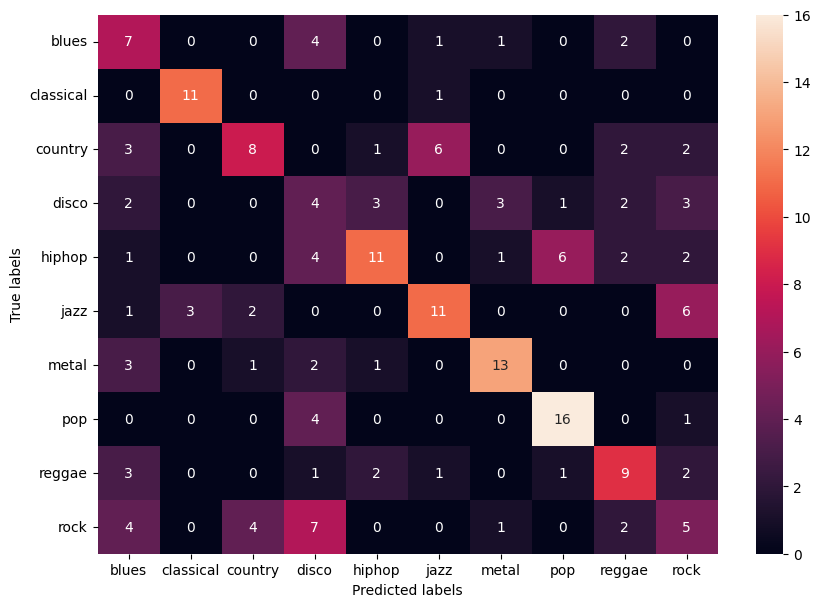

              precision    recall  f1-score   support

       blues       0.29      0.47      0.36        15
   classical       0.79      0.92      0.85        12
     country       0.53      0.36      0.43        22
       disco       0.15      0.22      0.18        18
      hiphop       0.61      0.41      0.49        27
        jazz       0.55      0.48      0.51        23
       metal       0.68      0.65      0.67        20
         pop       0.67      0.76      0.71        21
      reggae       0.47      0.47      0.47        19
        rock       0.24      0.22      0.23        23

    accuracy                           0.47       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.47      0.48       200



In [42]:
# Train KMeans Model

#train a random forest to classify the data 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#import kmeans
from sklearn.cluster import KMeans
#import SVC
from sklearn.svm import SVC


# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit GridSearchCV to the data
rf.fit(X_train, y_train)


# Predict the clusters on the test data
y_pred = rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Map the encoded labels back to the original genre names
genre_names = le.inverse_transform(range(len(le.classes_)))

# Display confusion matrix with genre names
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=genre_names, yticklabels=genre_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred, target_names=genre_names))